Classification Report:

              precision    recall  f1-score   support

    Deceased       0.00      0.00      0.00        23
  Readmitted       0.12      0.09      0.10        47
   Recovered       0.85      0.92      0.89       380

    accuracy                           0.79       450
   macro avg       0.33      0.34      0.33       450
weighted avg       0.73      0.79      0.76       450

Multi-class ROC AUC Score: 0.49095579137399553


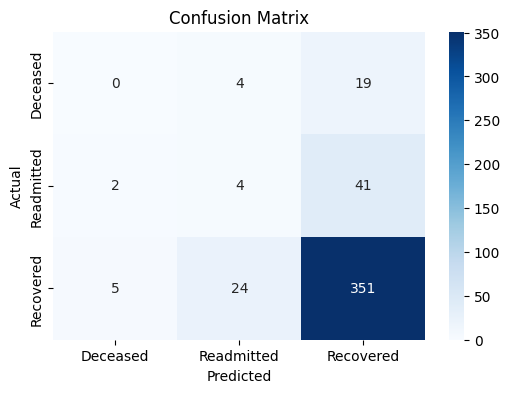

In [5]:
# STEP-3: Classification with SMOTE (Multi-class Imbalance Fix)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Clean Data
df = pd.read_csv(r"D:\final_project\data\processed\clean_healthcare.csv")

X = df.drop(columns=['outcome','length_of_stay_days'])
y = df['outcome']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply SMOTE to oversample minority classes
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Train RandomForest
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_res, y_res)

# Predictions
pred = model.predict(X_test)
prob = model.predict_proba(X_test)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, pred))

# Multi-class ROC-AUC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
roc_auc = roc_auc_score(y_test_bin, prob, multi_class='ovr')
print("Multi-class ROC AUC Score:", roc_auc)

# Confusion Matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
